# importing ,read the dataset plot,implement bag of words ,data pre processing, naive bayes ,evaluating model

In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
encode=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='spam.csv'
for encoding in encode:
    try:
        df=pd.read_csv(file_path,encoding=encoding)
        print(f"file successfully upoaded with encode: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"failed to enode:{encoding}")
        continue
if 'df' in locals():
    print("done")
else:
    print("fail")

failed to enode:utf-8
file successfully upoaded with encode: latin1
done


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5027,ham,Go chase after her and run her over while she'...,NaN,NaN,NaN
1402,ham,You have registered Sinco as Payee. Log in at ...,NaN,NaN,NaN
2939,spam,You have 1 new message. Please call 08712400200.,NaN,NaN,NaN
954,spam,Filthy stories and GIRLS waiting for your,NaN,NaN,NaN
4045,spam,Win a å£1000 cash prize or a prize worth å£5000,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
692,ham,"My sister in law, hope you are having a great ..."
327,ham,"I'd say that's a good sign but, well, you know..."
4146,ham,Pls help me tell sura that i'm expecting a bat...
3623,ham,No message..no responce..what happend?
508,ham,What's the significance?


In [8]:
k=df.rename(columns={'v1':'label','v2':'text'})

In [9]:
k.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
len(df)

5572

In [11]:
k.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


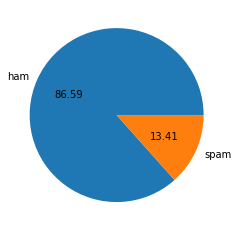

In [12]:
import matplotlib.pyplot as plt
plt.pie(k['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
k.loc[:,'label']=k.label.map({'ham':0,'spam':1})
k.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# bag of words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count=CountVectorizer()
text=count.fit_transform(k['text'])
x_train,x_test,y_train,y_test=train_test_split(text,k['label'],test_size=0.20,random_state=1)


In [15]:
print(x_train.shape)
print(x_test.shape)

(4457, 8672)
(1115, 8672)


In [2]:
import nltk


In [17]:
!pip install nltk

In [23]:
from nltk.corpus import stopwords

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [18]:
k['num_characters'] =k['text'].apply(len)

In [19]:
k.head()

,label,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


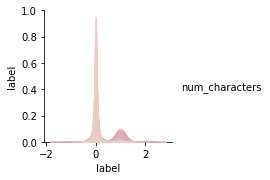

In [20]:
import seaborn as sns
sns.pairplot(k,hue='num_characters')

<AxesSubplot:>

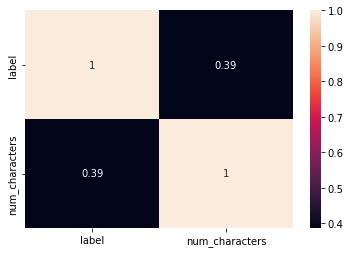

In [21]:
sns.heatmap(k.corr(),annot=True)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [23]:
X = tfidf.fit_transform(k['text']).toarray()

In [24]:
X.shape

(5572, 3000)

In [25]:
y = k['label'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [28]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8860986547085202
[[854 103]
 [ 24 134]]
0.5654008438818565


In [29]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9695067264573991
[[957   0]
 [ 34 124]]
1.0


In [30]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97847533632287
[[954   3]
 [ 21 137]]
0.9785714285714285


In [31]:
!pip install xgboost

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [34]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [35]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757847533632287, 0.9851851851851852)

In [36]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757847533632287
Precision -  0.9851851851851852
For  KN
Accuracy -  0.9183856502242153
Precision -  1.0
For  NB
Accuracy -  0.9695067264573991
Precision -  1.0
For  DT
Accuracy -  0.9452914798206278
Precision -  0.9619047619047619
For  LR
Accuracy -  0.95695067264574
Precision -  0.9583333333333334
For  RF
Accuracy -  0.9695067264573991
Precision -  1.0
For  AdaBoost
Accuracy -  0.9695067264573991
Precision -  0.9769230769230769
For  BgC
Accuracy -  0.9704035874439462
Precision -  0.9562043795620438
For  ETC
Accuracy -  0.9739910313901345
Precision -  1.0
For  GBDT
Accuracy -  0.9524663677130045
Precision -  0.972972972972973
For  xgb
Accuracy -  0.9704035874439462
Precision -  0.9844961240310077


In [38]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [39]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.918386,1.000000
2,NB,0.969507,1.000000
5,RF,0.969507,1.000000
8,ETC,0.973991,1.000000
0,SVC,0.975785,0.985185
10,xgb,0.970404,0.984496
6,AdaBoost,0.969507,0.976923
9,GBDT,0.952466,0.972973
3,DT,0.945291,0.961905
4,LR,0.956951,0.958333


In [40]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [41]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.918386
1,NB,Accuracy,0.969507
2,RF,Accuracy,0.969507
3,ETC,Accuracy,0.973991
4,SVC,Accuracy,0.975785
5,xgb,Accuracy,0.970404
6,AdaBoost,Accuracy,0.969507
7,GBDT,Accuracy,0.952466
8,DT,Accuracy,0.945291
9,LR,Accuracy,0.956951


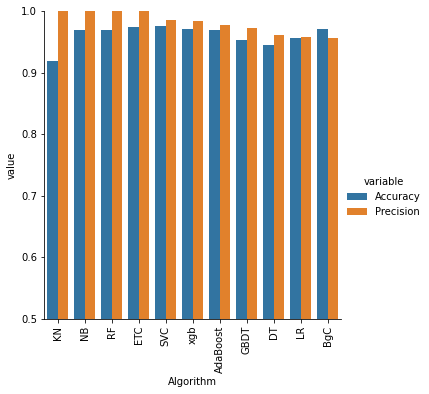

In [42]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.918386,1.000000,0.918386,1.000000,0.918386,1.000000,0.918386,1.000000
1,NB,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
2,RF,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000,0.969507,1.000000
3,ETC,0.973991,1.000000,0.973991,1.000000,0.973991,1.000000,0.973991,1.000000
4,SVC,0.975785,0.985185,0.975785,0.985185,0.975785,0.985185,0.975785,0.985185
5,xgb,0.970404,0.984496,0.970404,0.984496,0.970404,0.984496,0.970404,0.984496
6,AdaBoost,0.969507,0.976923,0.969507,0.976923,0.969507,0.976923,0.969507,0.976923
7,GBDT,0.952466,0.972973,0.952466,0.972973,0.952466,0.972973,0.952466,0.972973
8,DT,0.945291,0.961905,0.945291,0.961905,0.945291,0.961905,0.945291,0.961905
9,LR,0.956951,0.958333,0.956951,0.958333,0.956951,0.958333,0.956951,0.958333


In [45]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [46]:
from sklearn.ensemble import StackingClassifier

In [47]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [48]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9847533632286996
Precision 0.9795918367346939


In [49]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))